## All you need is love… And a pet!

<img src="img/dataset-cover.jpg" width="920">

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from itertools import combinations 
import ast
from sklearn.linear_model import LogisticRegression
import seaborn as sn
%matplotlib inline

data_folder = './data/'

### A) Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). 
- Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. 
- Standardize the values of each feature in the data to have mean 0 and variance 1.

The use of external libraries is not permitted in part A, except for numpy and pandas. 
You can drop entries with missing values.

In [84]:
columns = ['animal_type', 'intake_year', 'intake_condition', 'intake_number', 'intake_type', 'sex_upon_intake', \
          'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)', \
          'outcome_type']
original_data = pd.read_csv(data_folder+'aac_intakes_outcomes.csv', usecols=columns)

In [85]:
print(original_data.shape[0])

df_features = original_data.copy()
df_features['adopted'] = df_features['outcome_type'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Create training set
training_set = df_features.iloc[:int(0.8*original_data.shape[0])]
display(training_set.head())
# Create testing set
testing_set = df_features.iloc[int(0.8*original_data.shape[0]):]
display(testing_set.head())

79672


,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,adopted
0,Return to Owner,Neutered Male,10.0,Dog,Normal,Stray,Neutered Male,10.0,2017,1.0,0.588194,0
1,Return to Owner,Neutered Male,7.0,Dog,Normal,Public Assist,Neutered Male,7.0,2014,2.0,1.259722,0
2,Return to Owner,Neutered Male,6.0,Dog,Normal,Public Assist,Neutered Male,6.0,2014,3.0,1.113889,0
3,Transfer,Neutered Male,10.0,Dog,Normal,Owner Surrender,Neutered Male,10.0,2014,1.0,4.970139,0
4,Return to Owner,Neutered Male,16.0,Dog,Injured,Public Assist,Neutered Male,16.0,2013,1.0,0.119444,0


,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,adopted
63737,Return to Owner,Neutered Male,1.0,Dog,Normal,Stray,Neutered Male,1.0,2017,1.0,0.145139,0
63738,Transfer,Neutered Male,1.0,Dog,Normal,Stray,Intact Male,1.0,2017,2.0,4.334028,0
63739,Euthanasia,Unknown,2.0,Other,Normal,Wildlife,Unknown,2.0,2017,1.0,1.076389,0
63740,Adoption,Spayed Female,1.0,Dog,Normal,Stray,Intact Female,1.0,2017,1.0,101.946528,1
63741,Euthanasia,Unknown,1.0,Other,Injured,Wildlife,Unknown,1.0,2017,1.0,0.003472,0


In [86]:
# Get some dummies for the categorical features
categorical_columns = ['animal_type', 'intake_condition', 'intake_type', 'sex_upon_intake', 'sex_upon_outcome']
training_categorical = pd.get_dummies(training_set, columns=categorical_columns)
display(training_categorical.columns)

# Make sure to have the same dummies for the testing set
testing_categorical = pd.get_dummies(testing_set, columns=categorical_columns)[training_categorical.columns]

Index(['outcome_type', 'age_upon_outcome_(years)', 'age_upon_intake_(years)',
       'intake_year', 'intake_number', 'time_in_shelter_days', 'adopted',
       'animal_type_Bird', 'animal_type_Cat', 'animal_type_Dog',
       'animal_type_Other', 'intake_condition_Aged', 'intake_condition_Feral',
       'intake_condition_Injured', 'intake_condition_Normal',
       'intake_condition_Nursing', 'intake_condition_Other',
       'intake_condition_Pregnant', 'intake_condition_Sick',
       'intake_type_Euthanasia Request', 'intake_type_Owner Surrender',
       'intake_type_Public Assist', 'intake_type_Stray',
       'intake_type_Wildlife', 'sex_upon_intake_Intact Female',
       'sex_upon_intake_Intact Male', 'sex_upon_intake_Neutered Male',
       'sex_upon_intake_Spayed Female', 'sex_upon_intake_Unknown',
       'sex_upon_outcome_Intact Female', 'sex_upon_outcome_Intact Male',
       'sex_upon_outcome_Neutered Male', 'sex_upon_outcome_Spayed Female',
       'sex_upon_outcome_Unknown'],
     

In [87]:
# Separate the features and label
training_features = training_categorical.drop('adopted', axis=1)
training_features = training_features.drop('outcome_type', axis=1)
testing_features = testing_categorical.drop('adopted', axis=1)
testing_features = testing_features.drop('outcome_type', axis=1)

# Standardize the data
means = training_features.mean()
stddevs = training_features.std()

training_features_standard = pd.DataFrame()
for c in training_features.columns:
    training_features_standard[c] = (training_features[c]-means[c])/stddevs[c]

# Use the mean and stddev of the training set
testing_features_standard = pd.DataFrame()
for c in testing_features.columns:
    testing_features_standard[c] = (testing_features[c]-means[c])/stddevs[c]

training_features_standard.head()

,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Other,intake_condition_Aged,...,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown
0,2.648500,2.667945,1.869032,-0.288761,-0.375088,-0.062625,-0.75941,0.854234,-0.234676,-0.067137,...,-0.639736,-0.673239,2.230991,-0.415352,-0.301341,-0.355264,-0.365215,1.32899,-0.69464,-0.301341
1,1.628287,1.644969,-0.936871,1.765798,-0.360102,-0.062625,-0.75941,0.854234,-0.234676,-0.067137,...,-0.639736,-0.673239,2.230991,-0.415352,-0.301341,-0.355264,-0.365215,1.32899,-0.69464,-0.301341
2,1.288216,1.303977,-0.936871,3.820356,-0.363356,-0.062625,-0.75941,0.854234,-0.234676,-0.067137,...,-0.639736,-0.673239,2.230991,-0.415352,-0.301341,-0.355264,-0.365215,1.32899,-0.69464,-0.301341
3,2.648500,2.667945,-0.936871,-0.288761,-0.277295,-0.062625,-0.75941,0.854234,-0.234676,-0.067137,...,-0.639736,-0.673239,2.230991,-0.415352,-0.301341,-0.355264,-0.365215,1.32899,-0.69464,-0.301341
4,4.688926,4.713896,-1.872172,-0.288761,-0.385550,-0.062625,-0.75941,0.854234,-0.234676,-0.067137,...,-0.639736,-0.673239,2.230991,-0.415352,-0.301341,-0.355264,-0.365215,1.32899,-0.69464,-0.301341


### B) Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. 
- For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. 

In [88]:
# Train the logistic regression model
logistic = LogisticRegression(solver='lbfgs', max_iter=10000)

y_train = training_categorical['adopted']

logistic.fit(training_features_standard, y_train)

LogisticRegression(max_iter=10000)

In [89]:
def compute_rates(prediction_proba, true_label, threshold):
    prediction_label = (prediction_proba[:,1]>threshold).astype(int)

    TP = np.sum(np.logical_and(prediction_label==1, true_label==1))
    FP = np.sum(np.logical_and(prediction_label==1, true_label==0))
    TN = np.sum(np.logical_and(prediction_label==0, true_label==0))
    FN = np.sum(np.logical_and(prediction_label==0, true_label==1))

    confusion_matrix = np.asarray([[TP, FP], [FN, TN]])

    return confusion_matrix

In [90]:
# Compute the prediction using the logistic regression model
y_pred = logistic.predict_proba(testing_features_standard)

# Compute the confusion matrix
confusion_matrix = compute_rates(y_pred, testing_categorical['adopted'], 0.5)
display(confusion_matrix)

array([[6252, 1269],
       [1099, 7315]], dtype=int64)

In [91]:
def compute_scores(confusion_matrix):
    [[TP, FP],[FN, TN]] = confusion_matrix.astype(float)

    accuracy = (TP+TN)/(TP+TN+FP+FN)
    pos_precision = (TP)/(TP+FP)
    pos_recall = (TP)/(TP+FN)
    pos_f1_score = 2*pos_precision*pos_recall/(pos_precision+pos_recall)
    neg_precision = (TN)/(TN+FN)
    neg_recall = (TN)/(TN+FP)
    neg_f1_score = 2*neg_precision*neg_recall/(neg_precision+neg_recall)

    return accuracy, pos_precision, pos_recall, pos_f1_score, neg_precision, neg_recall, neg_f1_score

accuracy, pos_precision, pos_recall, pos_f1_score, neg_precision, neg_recall, neg_f1_score = compute_scores(confusion_matrix)
print("Accuracy : ", accuracy)
print("Positive Case : Precision : ", pos_precision, " Recall : ", pos_recall, " F1-score : ", pos_f1_score)
print("Negative Case : Precision : ", neg_precision, " Recall : ", neg_recall, " F1-score : ", neg_f1_score)

Accuracy :  0.8513962974584248
Positive Case : Precision :  0.8312724371759075  Recall :  0.8504965310842062  F1-score :  0.8407746100053792
Negative Case : Precision :  0.8693843594009983  Recall :  0.8521668219944082  F1-score :  0.8606894928815154


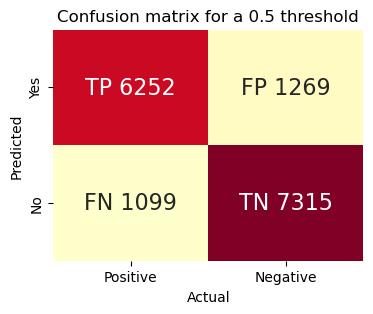

In [92]:
def plot_confusion_matrix(confusion_matrix):
    [[TP, FP],[FN, TN]] = confusion_matrix
    label = np.asarray([['TP {}'.format(TP), 'FP {}'.format(FP)],
                        ['FN {}'.format(FN), 'TN {}'.format(TN)]])
    
    df_cm = pd.DataFrame(confusion_matrix, index=['Yes', 'No'], columns=['Positive', 'Negative']) 
    
    return sn.heatmap(df_cm, cmap='YlOrRd', annot=label, annot_kws={"size": 16}, cbar=False, fmt='')

plt.figure(figsize = (4,3)) 
ax = plot_confusion_matrix(confusion_matrix)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion matrix for a 0.5 threshold')
plt.show()

### C) Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold.

C:\Users\jacqu\AppData\Local\Temp\ipykernel_24460\1528906889.py:8: RuntimeWarning: invalid value encountered in scalar divide
  neg_precision = (TN)/(TN+FN)
C:\Users\jacqu\AppData\Local\Temp\ipykernel_24460\1528906889.py:5: RuntimeWarning: invalid value encountered in scalar divide
  pos_precision = (TP)/(TP+FP)


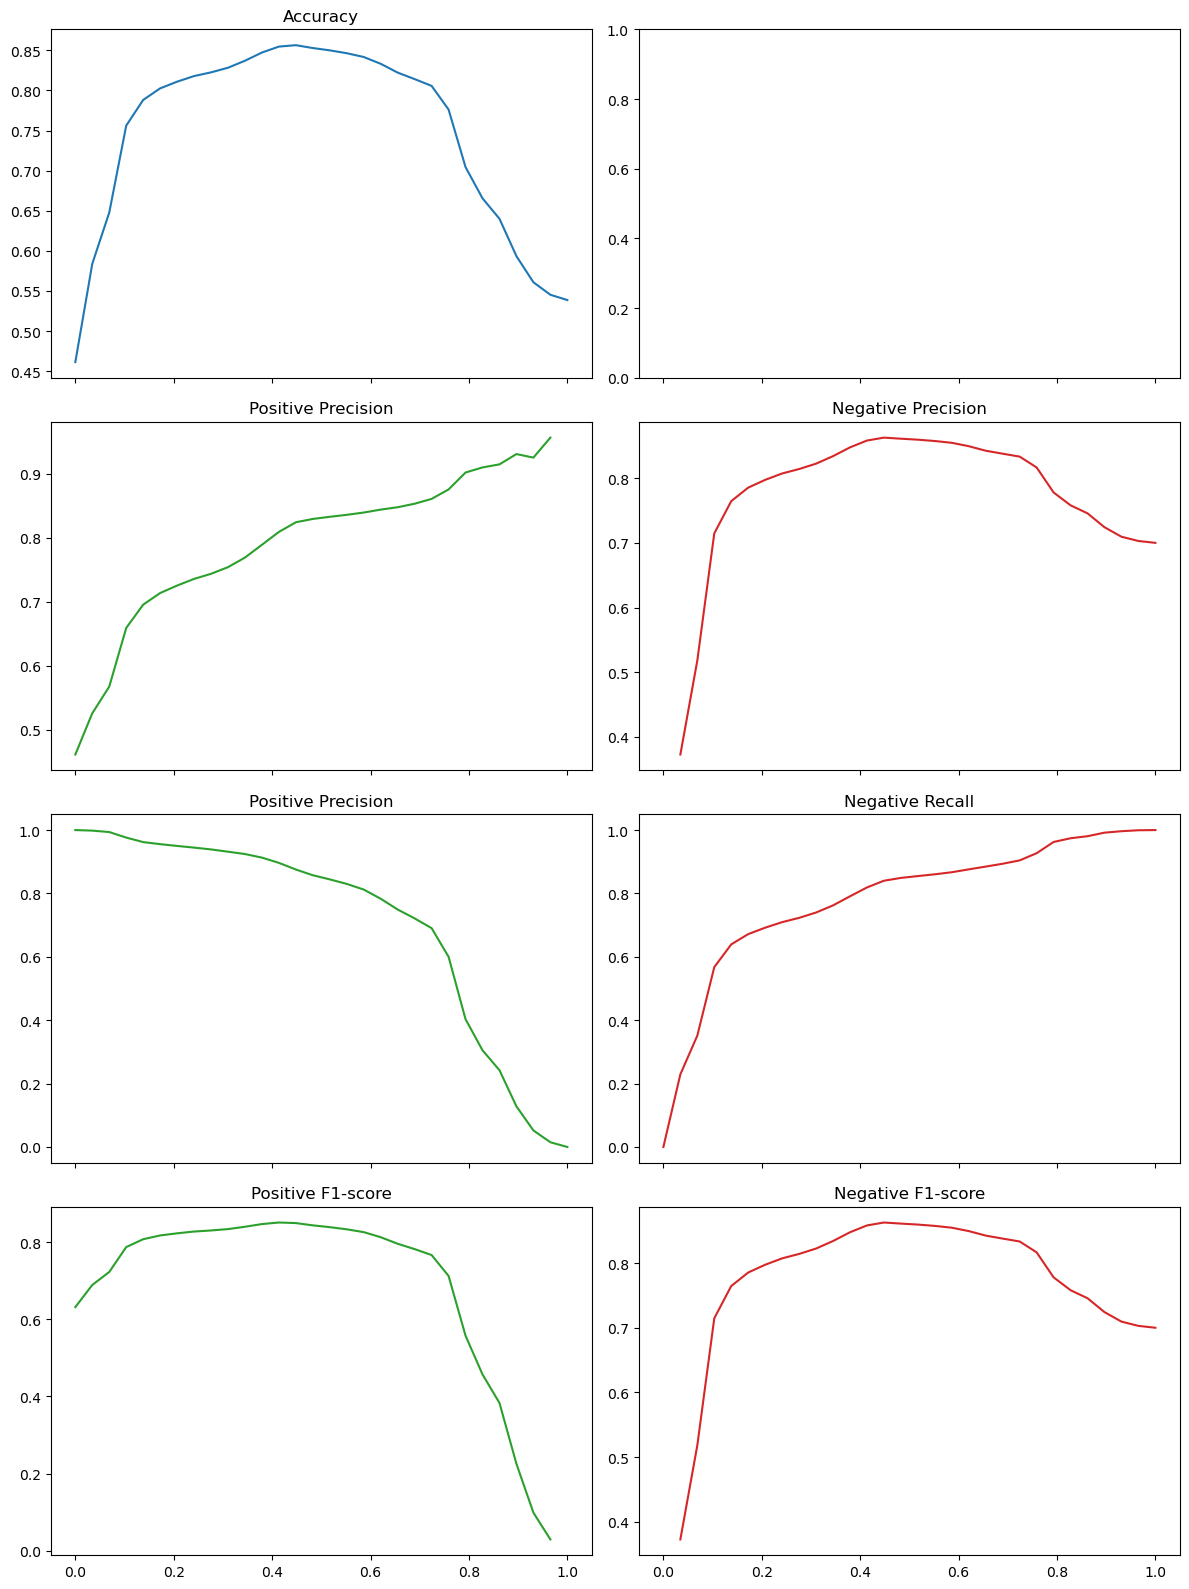

In [93]:
# thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
thresholds = np.linspace(0, 1, 30)
accuracies = []
pos_precisions = []
pos_recalls = []
pos_f1_scores = []
neg_precisions = []
neg_recalls = []
neg_f1_scores = []

for threshold in thresholds:
    confusion_matrix = compute_rates(y_pred, testing_categorical['adopted'], threshold)
    
    accuracy, pos_precision, pos_recall, pos_f1_score, neg_precision, neg_recall, neg_f1_score = compute_scores(confusion_matrix)
    accuracies.append(accuracy)
    pos_precisions.append(pos_precision)
    pos_recalls.append(pos_recall)
    pos_f1_scores.append(pos_f1_score)
    neg_precisions.append(neg_f1_score)
    neg_recalls.append(neg_recall)
    neg_f1_scores.append(neg_f1_score)
    

fig, axs = plt.subplots(4, 2, figsize=(12, 16), sharex=True)
axs[0, 0].plot(thresholds, accuracies)
axs[0, 0].set_title('Accuracy')
axs[1, 0].plot(thresholds, pos_precisions, 'tab:green')
axs[1, 0].set_title('Positive Precision')
axs[1, 1].plot(thresholds, neg_precisions, 'tab:red')
axs[1, 1].set_title('Negative Precision')
axs[2, 0].plot(thresholds, pos_recalls, 'tab:green')
axs[2, 0].set_title('Positive Precision')
axs[2, 1].plot(thresholds, neg_recalls, 'tab:red')
axs[2, 1].set_title('Negative Recall')
axs[3, 0].plot(thresholds, pos_f1_scores, 'tab:green')
axs[3, 0].set_title('Positive F1-score')
axs[3, 1].plot(thresholds, neg_f1_scores, 'tab:red')
axs[3, 1].set_title('Negative F1-score')
plt.tight_layout()
plt.show()

### D) Plot in a bar chart the coefficients of the logistic regression sorted by their contribution to the prediction.

In [94]:
tmp = []
for name, value in zip(training_features_standard.columns, logistic.coef_[0]):
    tmp.append({"name": name, "value": value})
    
features_coef = pd.DataFrame(tmp).sort_values("value")
features_coef.head()

,name,value
1,age_upon_intake_(years),-1.819483
28,sex_upon_outcome_Intact Male,-0.757526
21,intake_type_Wildlife,-0.748718
27,sex_upon_outcome_Intact Female,-0.649480
31,sex_upon_outcome_Unknown,-0.496937


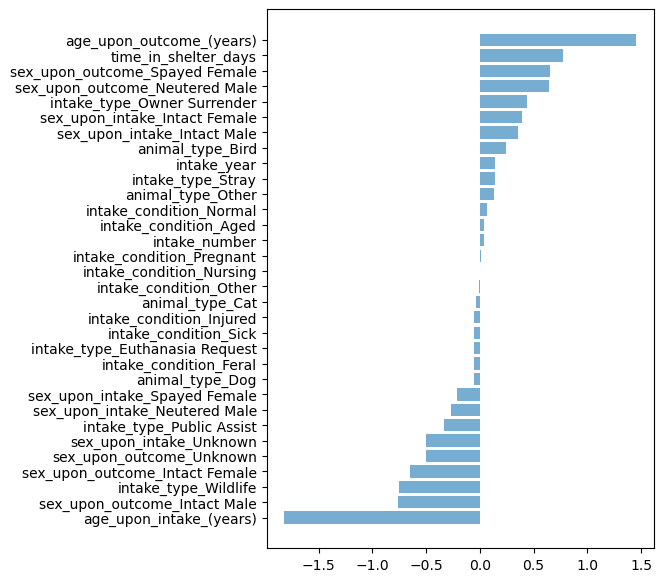

In [95]:
plt.subplots(figsize=(5,7))
plt.barh(features_coef.name, features_coef.value, alpha=0.6)
plt.show()


## Question 1: Which of the following metrics is most suitable when you are dealing with unbalanced classes?

- a) F1 Score
- b) Recall
- c) Precision
- d) Accuracy

The most suitable metric is the F1-score as it is the harmonic mean between precision and recall. It is especially suitable for unbalanced datasets because it takes both false positives and false negatives into account, ensuring that the performance on both classes is considered.

## Question 2: You are working on a binary classification problem. You trained a model on a training dataset and got the following confusion matrix on the test dataset. What is true about the evaluation metrics (rounded to the second decimal point):

|            | Pred = NO|Pred=YES|
|------------|----------|--------|
| Actual NO  |    50    |   10   |
| Actual YES |    5     |   100  |

- a) Accuracy is 0.95
- b) Accuracy is 0.85
- c) False positive rate is 0.95
- d) True positive rate is 0.95

In [96]:
accuracy = 150/165
print('Accuracy %.2f'%accuracy)
fpr = 10/(10+50)
print('False positive rate %.2f'%fpr)
tpr = 100/(100+5)
print('True positive rate %.2f'%tpr)

Accuracy 0.91
False positive rate 0.17
True positive rate 0.95


Hence the right answer is that the true positive rate is 0.95